## FOOTBALL

## 1-Reading the Dataset

#### Read the dataset into the Pandas DataFrame

In [4]:
import pandas as pd
football = pd.read_csv("results.csv")
football.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#### Does the dataset include any missing values?

In [6]:
football.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

###### Dataset doen't contain any missing values

## 2-Exploring the Dataset

#### How many tuples are there in the dataset?

In [10]:
print(f"Dataset contain {football.shape[0]} tuples")

Dataset contain 42650 tuples


#### How many tournaments are there in the dataset?

In [12]:
print(f"There are {len(football['tournament'].unique())} in the dataset")

There are 120 in the dataset


## 3-Convert and Deduce

#### Convert the column date to timestamps

In [15]:
#check attributes type
football.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

###### Column date type is "object", it should be in timestamps

In [17]:
#convert column date to timestamps
football.date = pd.to_datetime(football.date)

In [18]:
#check football date type
football.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

#### How many matches in the dataset were played in 2018?

In [20]:
print(f"There are {sum(football.date.dt.year == 2018)} matches played in 2018 in the dataset ")

There are 908 matches played in 2018 in the dataset 


## 4-Team Statistics 

#### how many times the home team won

In [23]:
home_team_won = sum(football.home_score > football.away_score)
print(f"Home team won {home_team_won} times")

Home team won 20739 times


#### how many times the home team lost

In [25]:
home_team_lost = sum(football.home_score < football.away_score)
print(f"Home team had lost {home_team_lost} times")

Home team had lost 12074 times


#### how many times the home team had a draw

In [27]:
home_team_draw = sum(football.home_score == football.away_score)
print(f"Home team had draw {home_team_draw} times")

Home team had draw 9837 times


## 5-Visualization

#### Plot the home team won, lost, or had a draw in a pie chart

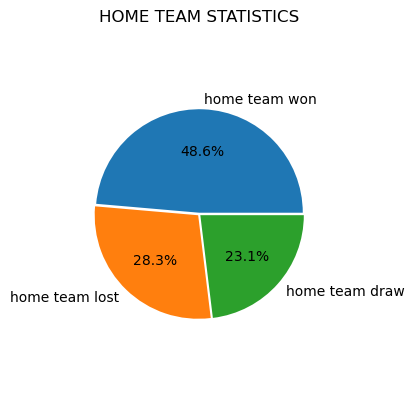

In [30]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([home_team_won, home_team_lost, home_team_draw])
pie_labels = ["home team won", "home team lost", "home team draw"]
explodes = [0.01, 0.01, 0.01]
plt.title("HOME TEAM STATISTICS")
plt.pie(y, labels = pie_labels,radius = 0.7, explode = explodes, autopct='%1.1f%%')

plt.show()

#### Plot the neutral column as a pie chart.

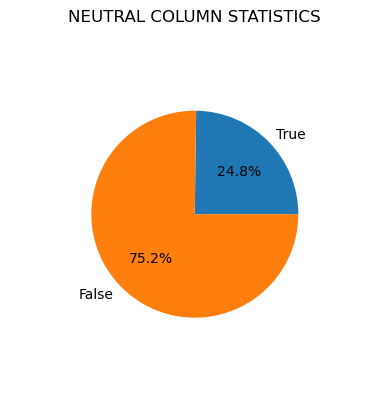

In [32]:
y = np.array([sum(football.neutral == True), sum(football.neutral == False)])
plt.pie(y, radius = 0.7, autopct='%1.1f%%', labels = ["True", "False"])
plt.title("NEUTRAL  STATISTICS")
plt.show()